# -----------------------Mobil Listrik--------------------------

Anggota kelompok III:
1. Yuzmi Zakya
2. Muhammad Ade Putra
3. Emi Andriani
4. Elisa Rosani

### Import libraries

In [1]:
# Import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from datetime import datetime

### Pre-processing 1

In [2]:
# load dataset Electric
df = pd.read_csv('Electric_Vehicle_Population_Data (1).csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [3]:
# mengecek duplikat
df.duplicated().sum()

0

In [4]:
# mendrop beberapa kolom
df = df.drop(columns=['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model', 'Legislative District',
                      'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis=1)

In [5]:
df

,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,PACIFICORP
1,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN
2,2021,VOLVO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN
3,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,PACIFICORP
4,2017,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...
124711,2022,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC
124712,2020,KIA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124713,2023,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
124714,2018,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...


#### Penjelasan tentang kolom-kolom yg digunakan

1. Model year =>
   
tahun pembuatan kendaraan atau mobil listrik itu sendiri

2. Make=>
   
nama perusahaan atau brand yg membuat kendaraan tersebut

3. Electric Vehicle Type=>
   
merujuk pada klasifikasi jenis-jenis kendaraan listrik berdasarkan desain dan konfigurasi mereka. Klasifikasi ini membantu membedakan jenis-jenis kendaraan listrik berdasarkan cara mereka menghasilkan tenaga listrik dan menggerakkan kendaraan

4. Clean Alternative Fuel Vehicle (CAFV) Eligibility=>
   
mengacu pada kelayakan atau persyaratan yang harus dipenuhi oleh kendaraan untuk dianggap sebagai kendaraan dengan bahan bakar alternatif bersih (Clean Alternative Fuel Vehicle)

5. Electric Range=>
   
merujuk pada jarak maksimum yang dapat ditempuh oleh kendaraan listrik dengan satu kali pengisian daya baterai penuh

6. Base MSRP=>
   
merujuk pada harga eceran yang disarankan oleh produsen kendaraan sebagai harga awal atau dasar untuk unit kendaraan baru sebelum mempertimbangkan tambahan atau opsi tambahan yang dapat dipilih oleh konsumen

7. Electric Utility=>
   
mengacu pada perusahaan atau lembaga yang bertanggung jawab atas produksi, transmisi, distribusi, dan penjualan listrik kepada konsumen

In [6]:
# mengganti nama kolom
df.columns = ['Year', 'Brand', 'Category', 'Alternative Fuel', 'Range', 'Manufacturer', 'Electric Utility']

In [7]:
df

,Year,Brand,Category,Alternative Fuel,Range,Manufacturer,Electric Utility
0,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,PACIFICORP
1,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN
2,2021,VOLVO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN
3,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,PACIFICORP
4,2017,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...
124711,2022,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC
124712,2020,KIA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124713,2023,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
124714,2018,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...


In [8]:
# memeriksa info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Year              124716 non-null  int64 
 1   Brand             124716 non-null  object
 2   Category          124716 non-null  object
 3   Alternative Fuel  124716 non-null  object
 4   Range             124716 non-null  int64 
 5   Manufacturer      124716 non-null  int64 
 6   Electric Utility  124243 non-null  object
dtypes: int64(3), object(4)
memory usage: 6.7+ MB


In [9]:
# mengecek missing value
df.isnull().sum()

Year                  0
Brand                 0
Category              0
Alternative Fuel      0
Range                 0
Manufacturer          0
Electric Utility    473
dtype: int64

In [10]:
# menghapus baris yg berisi missing value
df = df.dropna()

In [11]:
# mengecek kembali missing value
df.isnull().sum()

Year                0
Brand               0
Category            0
Alternative Fuel    0
Range               0
Manufacturer        0
Electric Utility    0
dtype: int64

In [12]:
# mengecek duplikat
df.duplicated().sum()

117819

In [13]:
# menghapus baris yg berisi duplikat
df = df.drop_duplicates()
df.duplicated().sum()

0

In [14]:
df.head()

,Year,Brand,Category,Alternative Fuel,Range,Manufacturer,Electric Utility
0,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,PACIFICORP
3,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,PACIFICORP
4,2017,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,PUGET SOUND ENERGY INC
5,2015,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC
6,2018,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,PUGET SOUND ENERGY INC


In [15]:
# Calculate the current year
current_year = datetime.now().year

# Calculate the age of the vehicle by subtracting the year of manufacture from the current year
df['Age'] = current_year - df['Year']

# Print the updated dataframe
print(df)

        Year      Brand                                Category  \
0       2020      TESLA          Battery Electric Vehicle (BEV)   
3       2019      TESLA          Battery Electric Vehicle (BEV)   
4       2017        BMW  Plug-in Hybrid Electric Vehicle (PHEV)   
5       2015     NISSAN          Battery Electric Vehicle (BEV)   
6       2018      TESLA          Battery Electric Vehicle (BEV)   
...      ...        ...                                     ...   
124616  2023        BMW  Plug-in Hybrid Electric Vehicle (PHEV)   
124668  2022        KIA          Battery Electric Vehicle (BEV)   
124694  2020      TESLA          Battery Electric Vehicle (BEV)   
124702  2014  CHEVROLET          Battery Electric Vehicle (BEV)   
124714  2018  CHEVROLET          Battery Electric Vehicle (BEV)   

                                         Alternative Fuel  Range  \
0                 Clean Alternative Fuel Vehicle Eligible    322   
3                 Clean Alternative Fuel Vehicle Eligible  

In [16]:
# mendrop kolom year
df.drop(columns='Year', axis=1)

,Brand,Category,Alternative Fuel,Range,Manufacturer,Electric Utility,Age
0,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,PACIFICORP,3
3,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,PACIFICORP,4
4,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,PUGET SOUND ENERGY INC,6
5,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC,8
6,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,PUGET SOUND ENERGY INC,5
...,...,...,...,...,...,...,...
124616,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,0
124668,KIA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||BIG BEND ELEC...,1
124694,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,3
124702,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,9


In [17]:
# mengecek duplikat
df.duplicated().sum()

0

In [18]:
# mengatur ulang ururtan kolom
df = df.loc[:, ['Range', 'Brand', 'Category', 'Alternative Fuel', 'Manufacturer',  'Electric Utility', 'Age']]

In [19]:
# mengubah nama item pada kolom Alternative fuel
df['Alternative Fuel'] = df['Alternative Fuel'].replace('Clean Alternative Fuel Vehicle Eligible', 'Vehicle Eligible')
df['Alternative Fuel'] = df['Alternative Fuel'].replace('Eligibility unknown as battery range has not been researched', 'Eligibility unknown')
df['Alternative Fuel'] = df['Alternative Fuel'].replace('Not eligible due to low battery range', 'Not eligible')

In [20]:
# mengubah nama item pada kolom category
df['Category'] = df['Category'].replace('Battery Electric Vehicle (BEV)', 'BEV')
df['Category'] = df['Category'].replace('Plug-in Hybrid Electric Vehicle (PHEV)', 'PHEV')

In [21]:
df.head()

,Range,Brand,Category,Alternative Fuel,Manufacturer,Electric Utility,Age
0,322,TESLA,BEV,Vehicle Eligible,0,PACIFICORP,3
3,289,TESLA,BEV,Vehicle Eligible,0,PACIFICORP,4
4,14,BMW,PHEV,Not eligible,0,PUGET SOUND ENERGY INC,6
5,84,NISSAN,BEV,Vehicle Eligible,0,PUGET SOUND ENERGY INC,8
6,215,TESLA,BEV,Vehicle Eligible,0,PUGET SOUND ENERGY INC,5


In [22]:
# mengecek komposisi dataset
df.shape

(6424, 7)

In [23]:
# mengecek jumlah data unik pada setiap kolom
df.nunique()

Range               101
Brand                35
Category              2
Alternative Fuel      3
Manufacturer         31
Electric Utility     73
Age                  21
dtype: int64

In [24]:
df

,Range,Brand,Category,Alternative Fuel,Manufacturer,Electric Utility,Age
0,322,TESLA,BEV,Vehicle Eligible,0,PACIFICORP,3
3,289,TESLA,BEV,Vehicle Eligible,0,PACIFICORP,4
4,14,BMW,PHEV,Not eligible,0,PUGET SOUND ENERGY INC,6
5,84,NISSAN,BEV,Vehicle Eligible,0,PUGET SOUND ENERGY INC,8
6,215,TESLA,BEV,Vehicle Eligible,0,PUGET SOUND ENERGY INC,5
...,...,...,...,...,...,...,...
124616,30,BMW,PHEV,Vehicle Eligible,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,0
124668,0,KIA,BEV,Eligibility unknown,0,BONNEVILLE POWER ADMINISTRATION||BIG BEND ELEC...,1
124694,322,TESLA,BEV,Vehicle Eligible,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,3
124702,82,CHEVROLET,BEV,Vehicle Eligible,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,9


### Visualisasi

<Axes: >

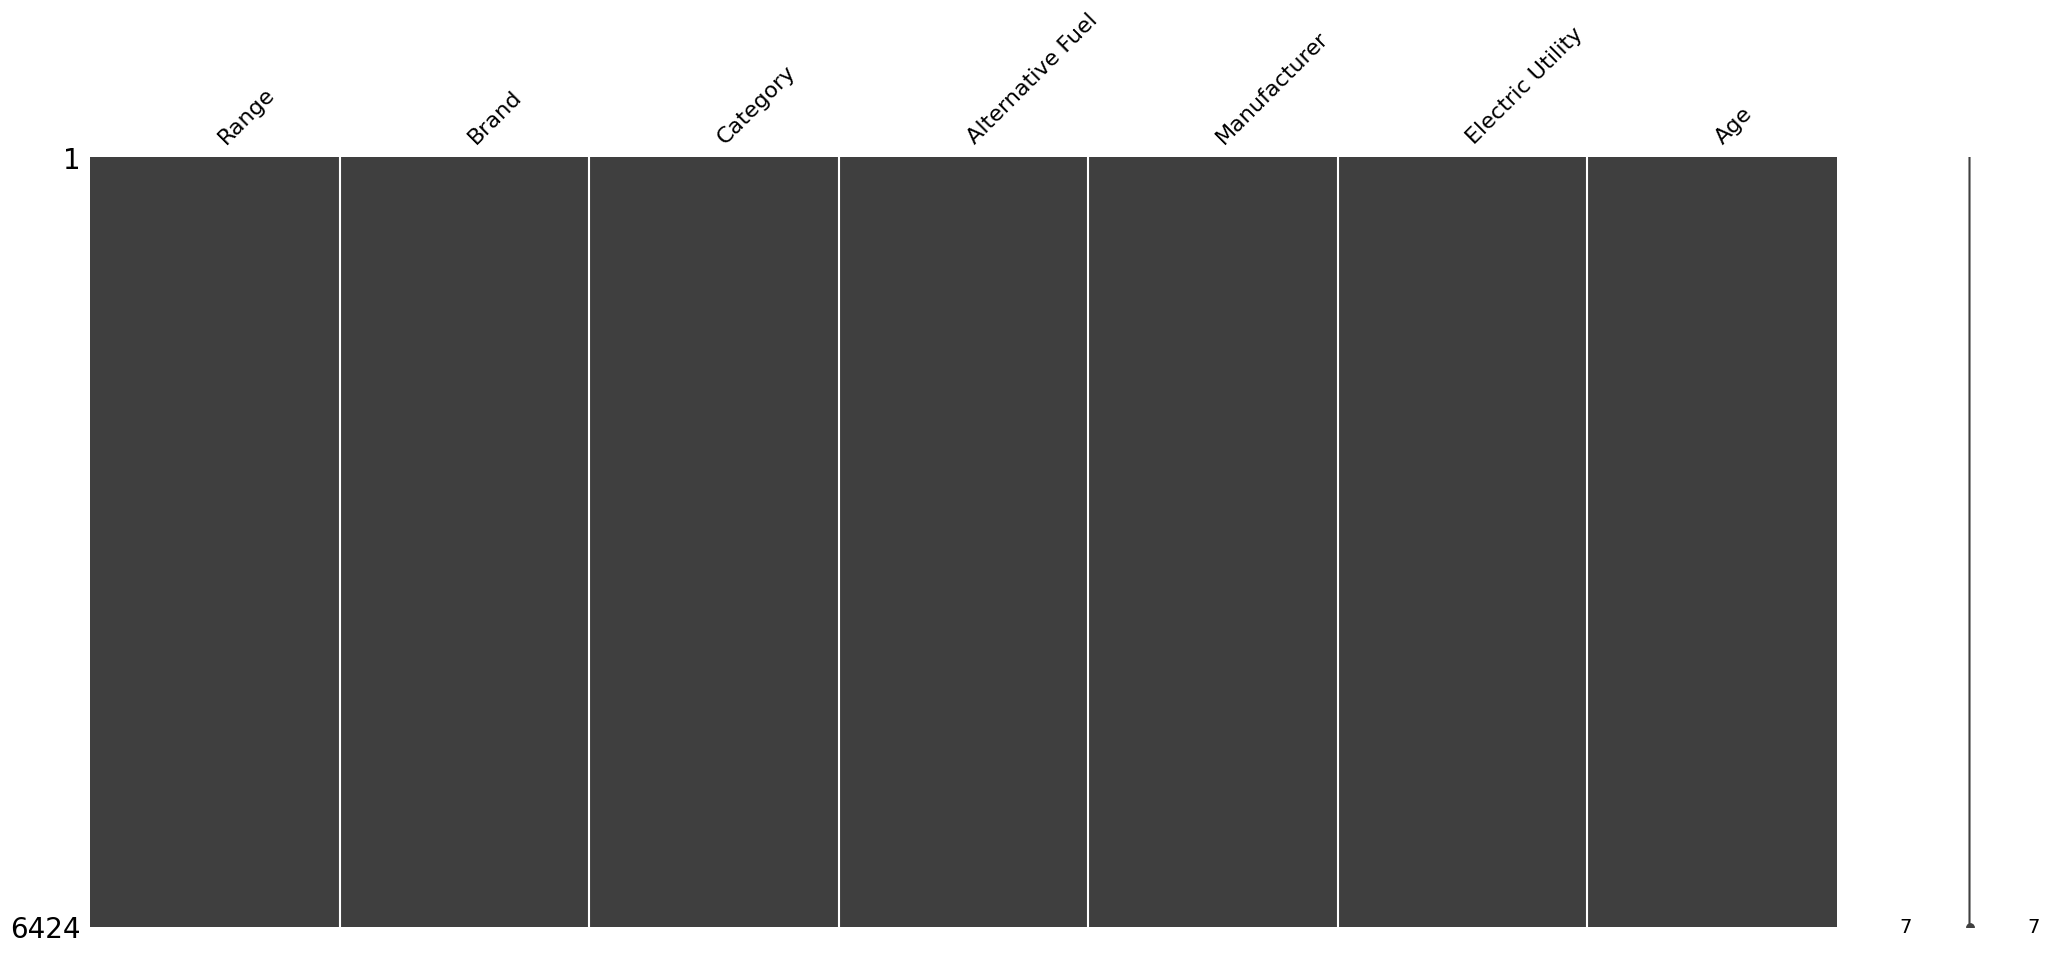

In [25]:
# memvisualisasikan missing value
missingno.matrix(df)

#### Range Distribution

In [ ]:
sns.distplot(df['Range'], hist_kws={'color':'purple', 'edgecolor':'black', 'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Range Distribution")
plt.show()

#### Age Distribution

In [ ]:
sns.distplot(df['Age'],
             hist_kws={'color':'blue', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Age Distribution")
plt.show()

#### Barplot Age vs Range

In [ ]:
ax= plt.figure(figsize=(10,5))
sns.barplot(x='Age',y='Range',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Age VS Range')
plt.xlabel('Age')
plt.ylabel('Range')
plt.xticks(rotation=45);

#### Barplot Brand vs Range

In [ ]:
# mengecek value count kolom brand
df['Brand'].value_counts()

####  Barplot Brand

In [ ]:
sns.countplot(x ='Brand', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Brand wise Car")
sns.set(rc={"figure.figsize":(6, 4)})
plt.show()

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Range VS Brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show();

#### Barplot Category 

In [ ]:
# mengecek value count kolom category
df['Category'].value_counts()

In [ ]:
sns.countplot(x ='Category', data = df,palette ='PiYG')
plt.title("Category wise Cars")
sns.set(rc={"figure.figsize":(6, 4)})
plt.show()

sns.barplot(x="Category", y="Range", data=df, palette="PiYG")
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Category wise Range")
plt.show()

#### Barplot Manufacturer 

In [ ]:
# mengecek value count kolom manufacturer
df['Manufacturer'].value_counts()

In [ ]:
sns.countplot(x ='Manufacturer', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Manufacturer wise Cars")
sns.set(rc={"figure.figsize":(6, 4)})
plt.show()

sns.barplot(x="Manufacturer", y="Range", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Manufacturer wise Range")
plt.show()

#### Barplot Alternative Fuel

In [ ]:
# mengecek value count kolom alternative fuel
df['Alternative Fuel'].value_counts()

In [ ]:
sns.countplot(x ='Alternative Fuel', data = df,palette ='PiYG')
plt.title("Alternative Fuel wise Cars")
sns.set(rc={"figure.figsize":(7, 5)})
plt.show()

sns.barplot(x="Alternative Fuel", y="Range", data=df, palette="PiYG")
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Alternative Fuel wise Range")
plt.show()

#### Barplot Electric Utility

In [ ]:
# mengecek value count kolom Electric Utility
df['Electric Utility'].value_counts()

In [ ]:
# Menghitung frekuensi masing-masing mileage dalam kolom
Electric_counts = df['Electric Utility'].value_counts()

# Mengambil 100 mileage teratas untuk ditampilkan
top_Electric = Electric_counts.head(10)

# Membuat horizontal barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_Electric.values, y=top_Electric.index)
plt.xlabel('Jumlah')
plt.ylabel('Electric Utility')
plt.title('Top 10 Electric Utility')
plt.show()

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Electric Utility',y='Range',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Range VS Electric Utility')
plt.xlabel('Electric Utility')
plt.ylabel('Range')
plt.xticks(rotation='vertical')
plt.show();


In [ ]:
# mengecek kolom pada dataframe
df.columns

In [ ]:
df.head()

## Pre-processing 2

#### Encode beberapa kolom untuk permodelan

In [ ]:
df = pd.get_dummies(df, columns=['Brand' ,'Category', 'Alternative Fuel', 'Electric Utility'])

In [ ]:
df.head()

In [ ]:
# mengecek correlation
df.corr()

In [ ]:
# menampilkan Heatmap berdasarkan data
plt.figure(figsize=(50, 50))
correlation = df.corr(method='spearman')
sns.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap='vlag', annot=True, fmt='.2f', annot_kws={'size': 10})

## MODELLING

#### Import library untuk permodelan

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Splitting data
X = df.drop(columns='Range', axis=1)
y = df.Range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the model
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)

#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    r2_square = metrics.r2_score(true, predicted)
    print('R2 Square', r2_square)
    
print('KNN Algorithm Test set evaluation:')
print_evaluate(y_test, pred_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Splitting data
X = df.drop(columns='Range', axis=1)
y = df.Range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('lr.intercept_', lr.intercept_)

In [ ]:
# Predict the model
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)

#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    r2_square = metrics.r2_score(true, predicted)
    print('R2 Square', r2_square)

print('KNN Algorithm Test set evaluation:')
print_evaluate(y_test, pred_test)

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
# Predict the model
pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    r2_square = metrics.r2_score(true, predicted)
    print('R2 Square', r2_square)

print('Test set evaluation:')
print_evaluate(y_test, pred_test)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Splitting data
X = df.drop(columns='Range', axis=1)
y = df.Range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the model
pred_test = nb.predict(X_test)
pred_train = nb.predict(X_train)

#Model evaluation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    r2_square = metrics.r2_score(true, predicted)
    print('R2 Square', r2_square)

print('Test set evaluation:')
print_evaluate(y_test, pred_test)